<div style="text-align: center;">
    <a id="2"></a>
    <p style="font-size: 40px; color: #190033; font-family: 'Comic Sans MS'; background-color:skyblue; border-radius: 5px; padding: 15px; text-align: center;"><strong>HEART FAILURE PREDICTION</strong></p>
</div>

![](http://www.mydr.com.au/wp-content/uploads/2019/04/heart_failure_750.jpeg)

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The purpose of this Notebook is to develop a machine learning model in order to predict the heart failure probability, and for that we will use the dataset heart_failure_clinical_records_dataset.csv

Essential libraries to work


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  70.0        0                      2695         1                 40   
1  45.0        1                        66         1                 25   
2  75.0        1                       203         1                 38   
3  70.0        0                        81         1                 35   
4  62.0        0                        30         1                 60   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0   241000.0               1.0           137    1   
1                    0   233000.0               0.8           135    1   
2                    1   283000.0               0.6           131    1   
3                    1   533000.0               1.3           139    0   
4                    1   244000.0               0.9           139    1   

   smoking  time  DEATH_EVENT  
0        0   247            0  
1        0   230            0  
2        1    74            0  
3        0   212            0  
4        0   117            0

* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [3]:
col = df.columns
col

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.511276
ejection_fraction          -0.302391
serum_sodium               -0.186342
platelets                  -0.044250
smoking                    -0.014120
sex                         0.000607
diabetes                    0.004943
high_blood_pressure         0.040363
creatinine_phosphokinase    0.072448
anaemia                     0.075700
age                         0.247136
serum_creatinine            0.281244
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Data Visulaization and Correlation Analysis

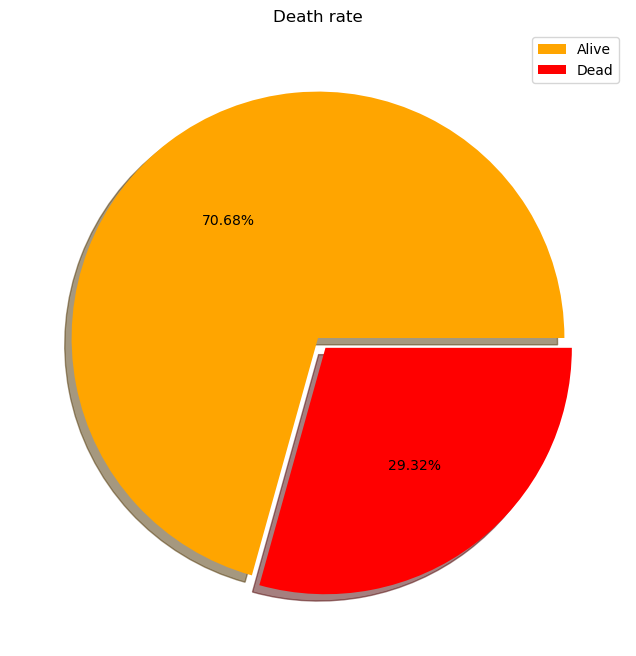

In [4]:
explode = (0,0.05)
plt.figure(figsize = (8,8))
plt.pie(df['DEATH_EVENT'].value_counts(),explode = explode,shadow = True,autopct='%1.2f%%',colors = ['orange','red'])
plt.legend(['Alive','Dead'])
plt.title('Death rate')
plt.show()


Text(0.5, 1.0, 'Death Probability based on smoking')

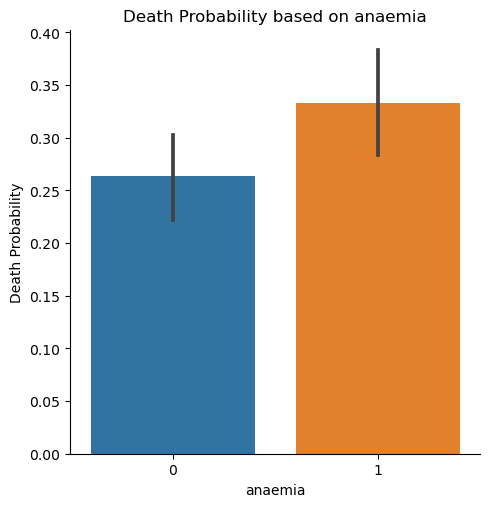

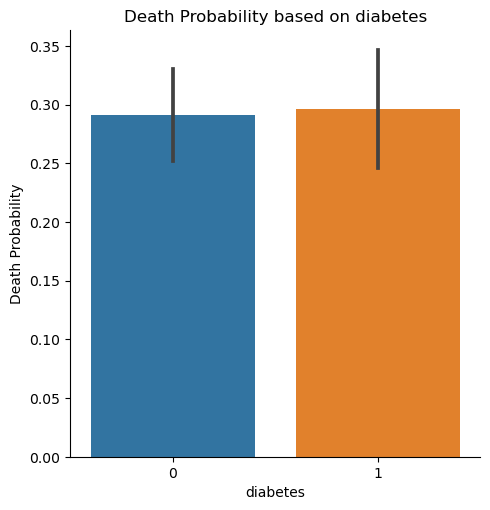

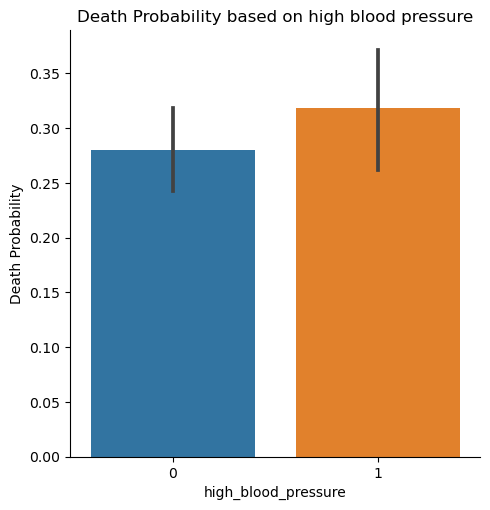

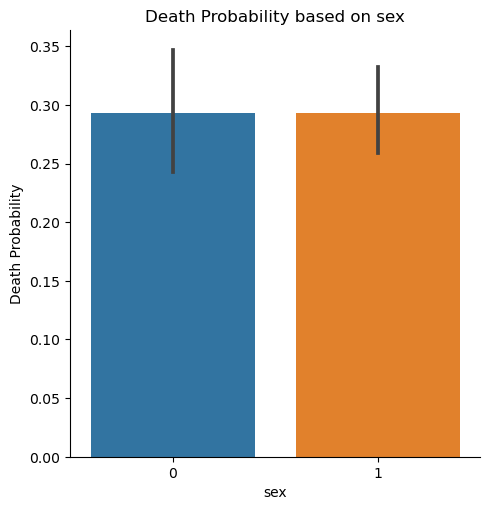

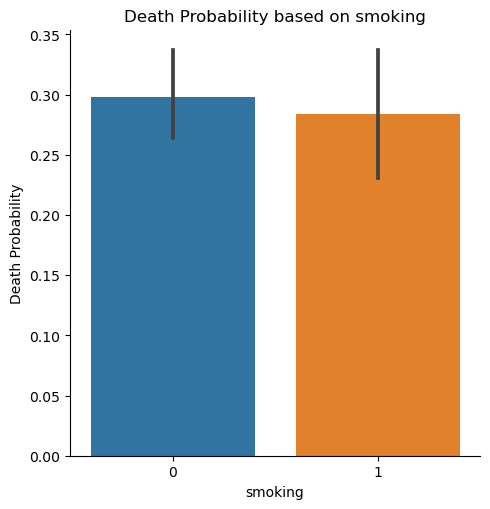

In [5]:
#Features with 2 values

g1=sns.catplot(x="anaemia", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['anaemia']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on anaemia')


g1=sns.catplot(x="diabetes", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['diabetes']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on diabetes')


g1=sns.catplot(x="high_blood_pressure", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['high_blood_pressure']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on high blood pressure')


g1=sns.catplot(x="sex", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['sex']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on sex')


g1=sns.catplot(x="smoking", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['smoking']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on smoking')

# Is Age and Sex an indicator for Death Event?

In [5]:
# age distribution
hist_data =[df["age"].values]
group_labels = ['age'] 
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

* Age wise 40 to 80 the spread is High
* less than 40 age and higher than 80 age people are very low

In [6]:
fig = px.box(df, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [7]:
import plotly.graph_objs as go

male = df[df["sex"] == 1]
female = df[df["sex"] == 0]
male_survived = male[male["DEATH_EVENT"] == 0]
male_not_survived = male[male["DEATH_EVENT"] == 1]
female_survived = female[female["DEATH_EVENT"] == 0]
female_not_survived = female[female["DEATH_EVENT"] == 1]

labels = ['Male - Survived', 'Male - Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [
    len(male_survived), len(male_not_survived),
    len(female_survived), len(female_not_survived)
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title_text="Analysis on Survival - Gender")
fig.show()


### Gender Factor Analysis

In [8]:
import plotly.figure_factory as ff

surv = df[df["DEATH_EVENT"] == 0]["age"]
not_surv = df[df["DEATH_EVENT"] == 1]["age"]

hist_data = [surv, not_surv]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Age on Survival Status")
fig.show()


* Survival is high on 40 to 70
* The spread of Not survival is going through all ages.

In [9]:
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

Age Report

* Survival spread is high in age's flow of 40 to 70
* The Survival is high for both male between 50 to 60 and female's age between 60 to 70 respectively

In [10]:
fig = px.violin(df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

* The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60
* Death event for smoking person is high than not smoking person

In [11]:
fig = px.violin(df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all", hover_data=df.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

### Hist Plots

In [12]:
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [13]:
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [14]:
fig = px.histogram(df, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [15]:
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns)
fig.show()

In [16]:
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=df.columns)
fig.show()

**Distribution plots Survived and Not-Survived**

In [17]:
surv = df[df['DEATH_EVENT'] == 0]['serum_sodium']
not_surv = df[df['DEATH_EVENT'] == 1]['serum_sodium']

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Histogram(x=surv, name='Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=not_surv, name='Not Survived', opacity=0.5))

fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status",
    xaxis_title="Serum Sodium",
    yaxis_title="Count",
    barmode='overlay'
)

fig.show()







In [18]:
surv = df[df['DEATH_EVENT']==0]['serum_creatinine']
not_surv = df[df['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [19]:
surv = df[df['DEATH_EVENT']==0]['ejection_fraction']
not_surv = df[df['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

### Pie Charts

In [20]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = df[df['diabetes']==1]
diabetes_no = df[df['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Diabetes")
fig.show()

From the above pie chart we can conclude that in our dataset 58.2% (174) pepole are No Diabetes Person and 41.8% (125) are Diabetes Person.

In [21]:
fig = px.pie(df, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio')
fig.show()

In [22]:
import plotly.graph_objects as go

diabetes_yes_surv = df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 0)]
diabetes_yes_not_surv = df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 1)]
diabetes_no_surv = df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 0)]
diabetes_no_not_surv = df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 1)]

labels = ['Diabetes Yes - Survived', 'Diabetes Yes - Not Survived', 'Diabetes No - Survived', 'Diabetes No - Not Survived']
values = [
    len(diabetes_yes_surv),
    len(diabetes_yes_not_surv),
    len(diabetes_no_surv),
    len(diabetes_no_not_surv)
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes"
)
fig.show()


* From above pie charts we can conclude that in our dataset diabetes from 174 of Non Diabetes person 118 are survived and 56 are not survived and
* From 125 Diabetes person 85 are survived, while 40 are not survived.

In [23]:
anaemia_yes = df[df['anaemia']==1]
anaemia_no = df[df['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia")
fig.show()

From the above pie chart we can conclude that in our dataset 56.9%(170) peoples are Non anaemic pepoles, while 43.1%(129) are anaemic peoples.

In [ ]:
fig = px.pie(df, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration')
fig.show()

In [24]:
anaemia_yes_surv = df[(df["anaemia"] == 1) & (df["DEATH_EVENT"] == 0)]
anaemia_yes_not_surv = df[(df["anaemia"] == 1) & (df["DEATH_EVENT"] == 1)]
anaemia_no_surv = df[(df["anaemia"] == 0) & (df["DEATH_EVENT"] == 0)]
anaemia_no_not_surv = df[(df["anaemia"] == 0) & (df["DEATH_EVENT"] == 1)]

labels = ['Anaemia Yes - Survived', 'Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia No - Not Survived']
values = [
    len(anaemia_yes_surv),
    len(anaemia_yes_not_surv),
    len(anaemia_no_surv),
    len(anaemia_no_not_surv)
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia"
)
fig.show()







* From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and
* From 129 Anaemic person 83 are survived, while 46 are not survived.

In [25]:
hbp_yes = df[df['high_blood_pressure']==1]
hbp_no = df[df['high_blood_pressure']==0]
labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [26]:
fig = px.pie(df, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio')
fig.show()

In [27]:
hbp_yes_surv = df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 0)]
hbp_yes_not_surv = df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 1)]
hbp_no_surv = df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 0)]
hbp_no_not_surv = df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 1)]

labels = ['HBP Yes - Survived', 'HBP Yes - Not Survived', 'HBP No - Survived', 'HBP No - Not Survived']
values = [
    len(hbp_yes_surv),
    len(hbp_yes_not_surv),
    len(hbp_no_surv),
    len(hbp_no_not_surv)
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP (High Blood Pressure)"
)
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 194 of Non High BP person 137 are survived and 57 are not survived and
* From 105 High BP person 66 are survived, while 39 are not survived.

In [28]:
smoking_yes = df[df['smoking']==1]
smoking_no = df[df['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking")
fig.show()

From the above pie chart we can conclude that in our dataset 67.9%(203) pepoles are Non Smoking pepoles, while 32.1%(96) are Smoking pepoles.

In [29]:
fig = px.pie(df, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio')
fig.show()

In [30]:
smoking_yes_surv = df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 0)]
smoking_yes_not_surv = df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 1)]
smoking_no_surv = df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 0)]
smoking_no_not_surv = df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 1)]

labels = ['Smoking Yes - Survived', 'Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking No - Not Survived']
values = [
    len(smoking_yes_surv),
    len(smoking_yes_not_surv),
    len(smoking_no_surv),
    len(smoking_no_not_surv)
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking"
)
fig.show()

* From above pie charts we can conclude that in our dataset diabetes from 203 of Non Smoking person 137 are survived and 66 are not survived and
* From 96 Smoking person 66 are survived, while 30 are not survived.


### Heatmap

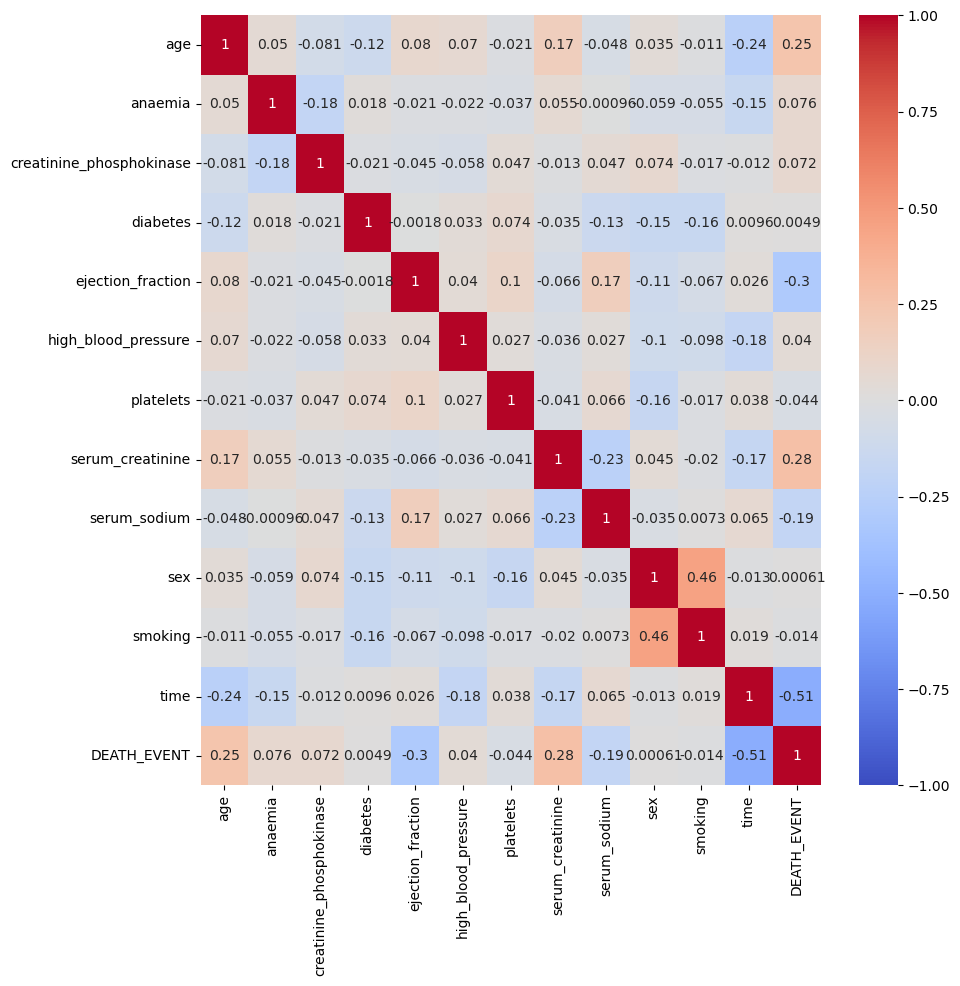

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

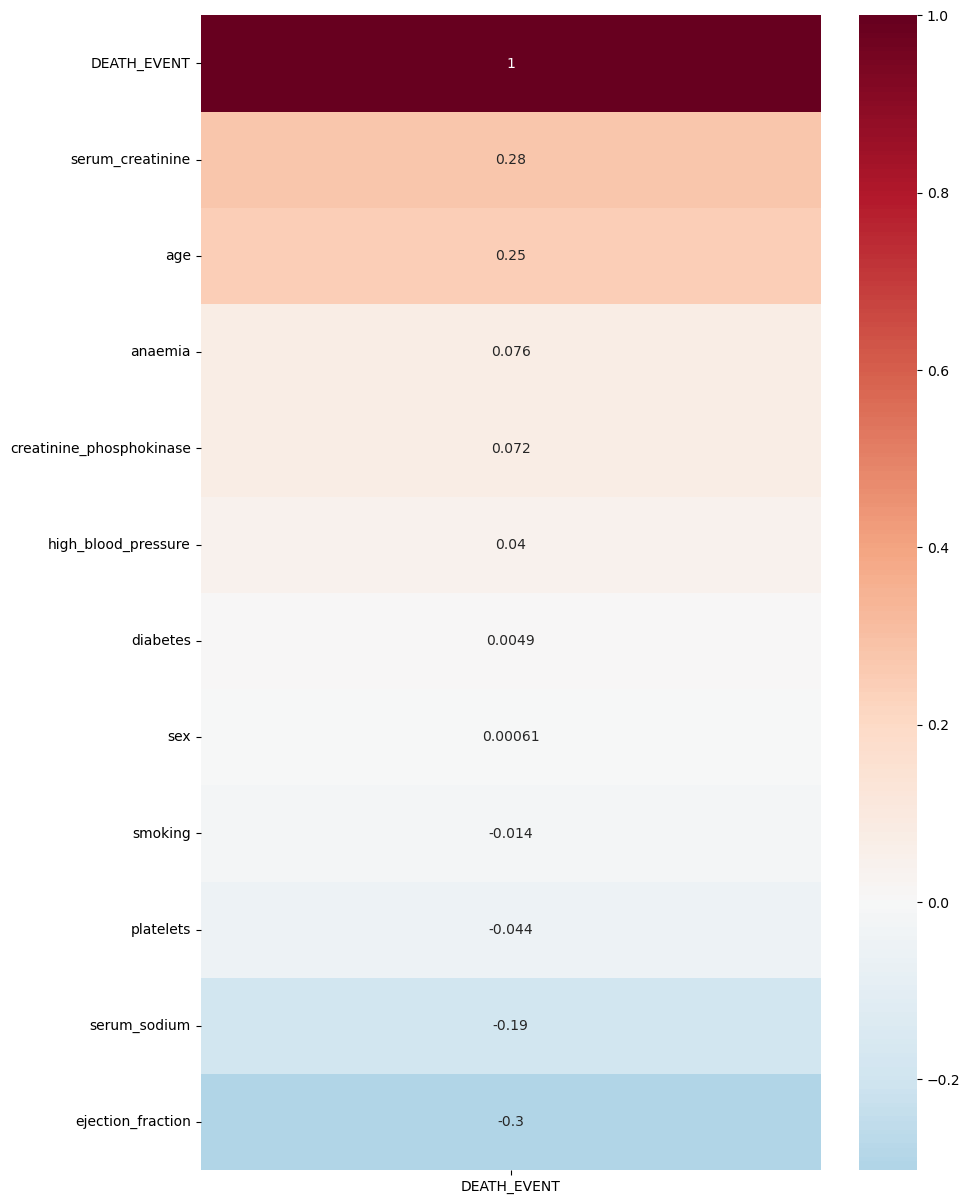

In [6]:
data=pd.get_dummies(df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
       'DEATH_EVENT']])
plt.figure(figsize=(10,15))
sns.heatmap(data.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT',ascending=False),cmap="RdBu_r",center=0.0, annot=True);

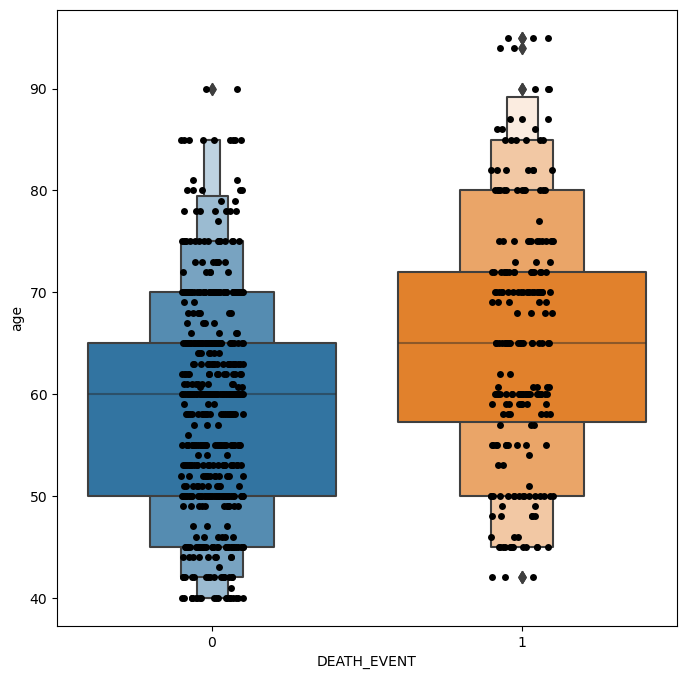

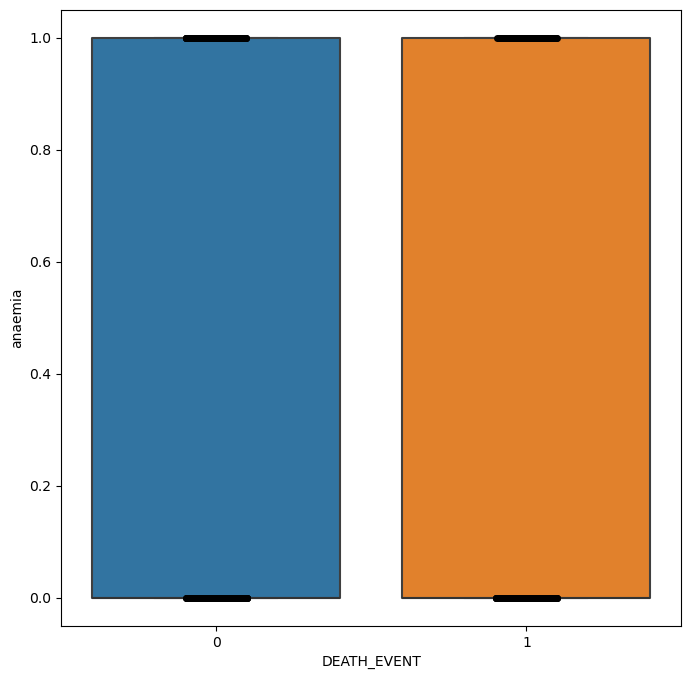

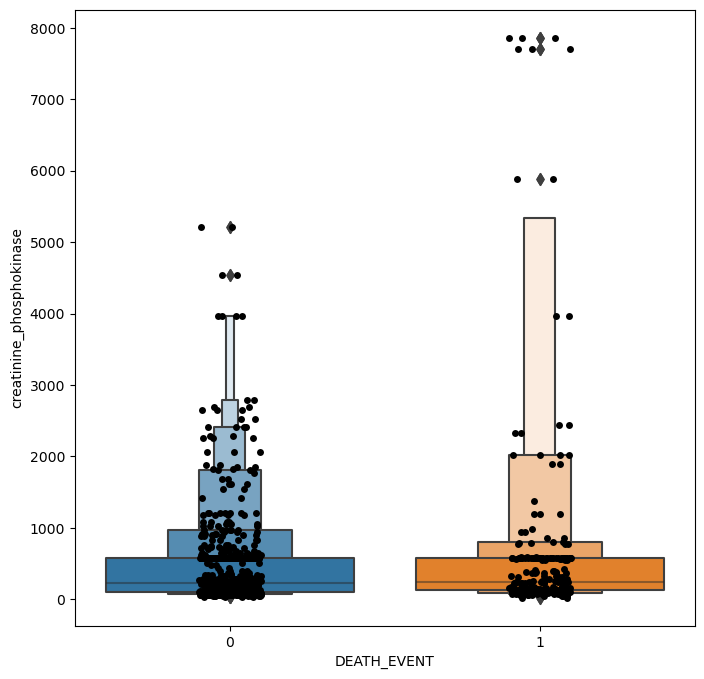

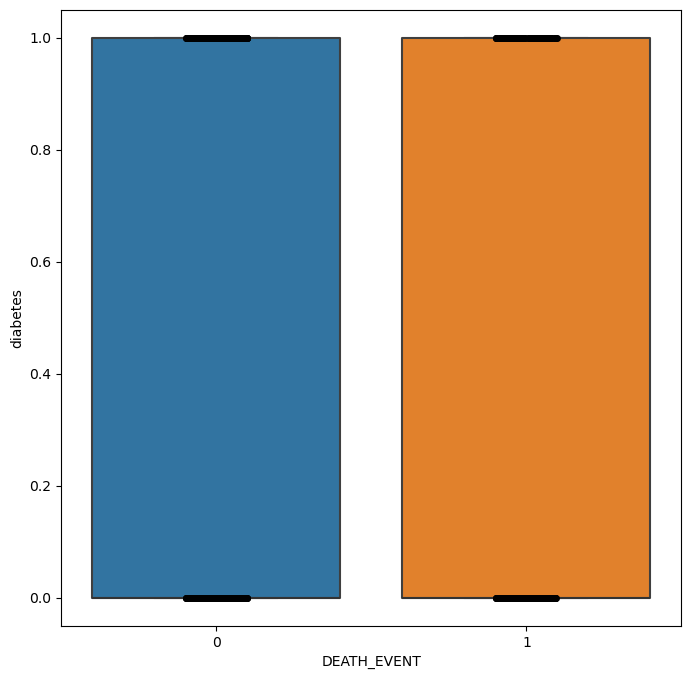

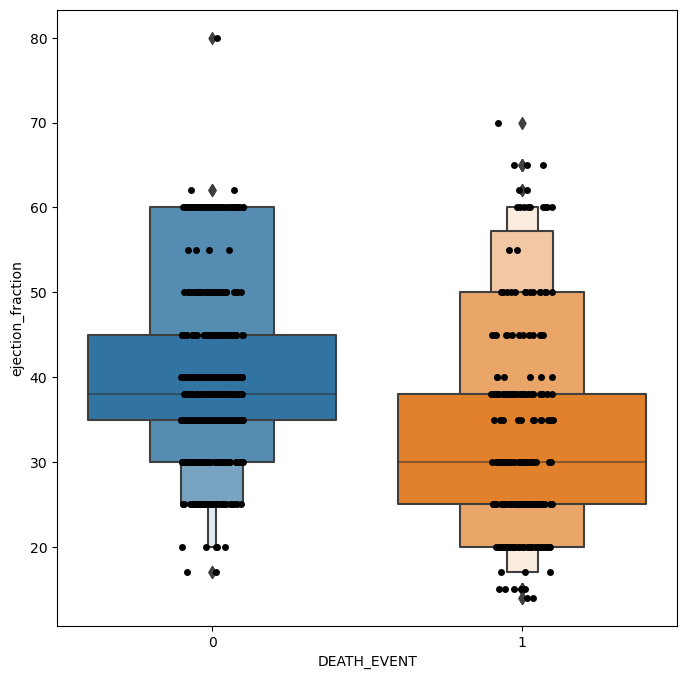

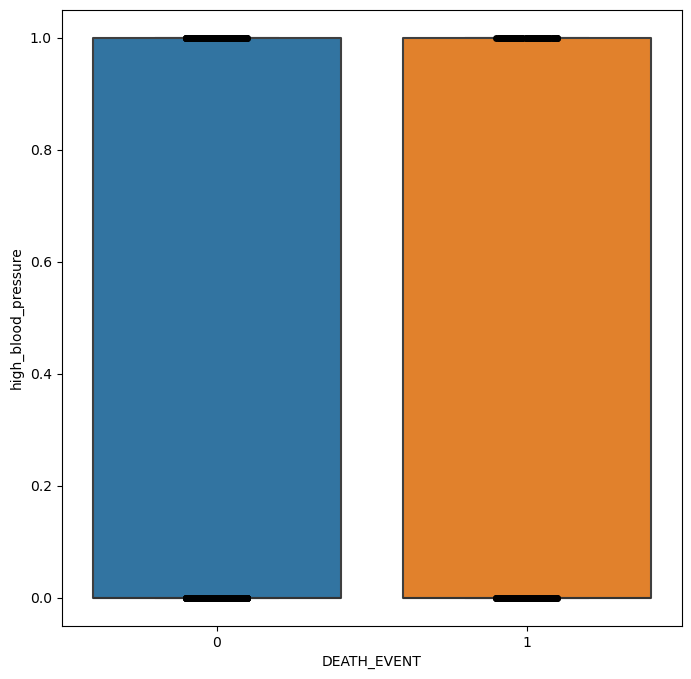

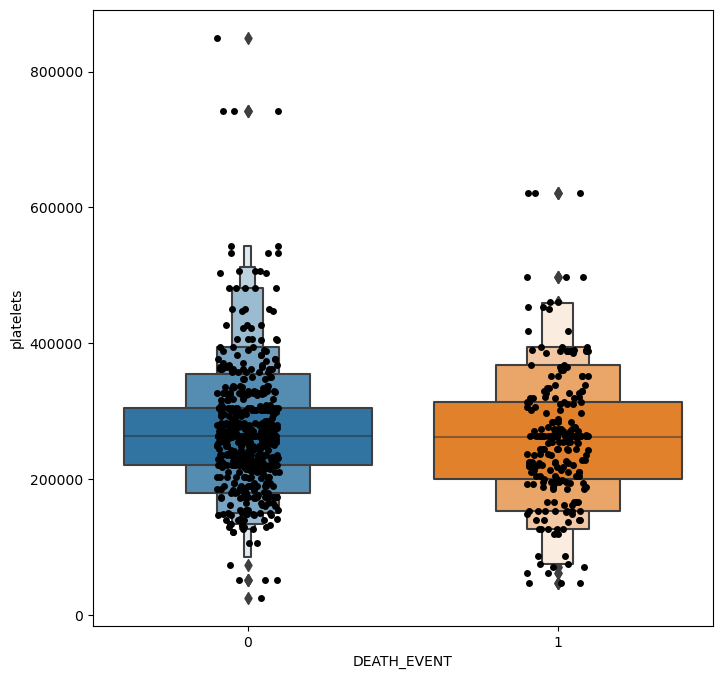

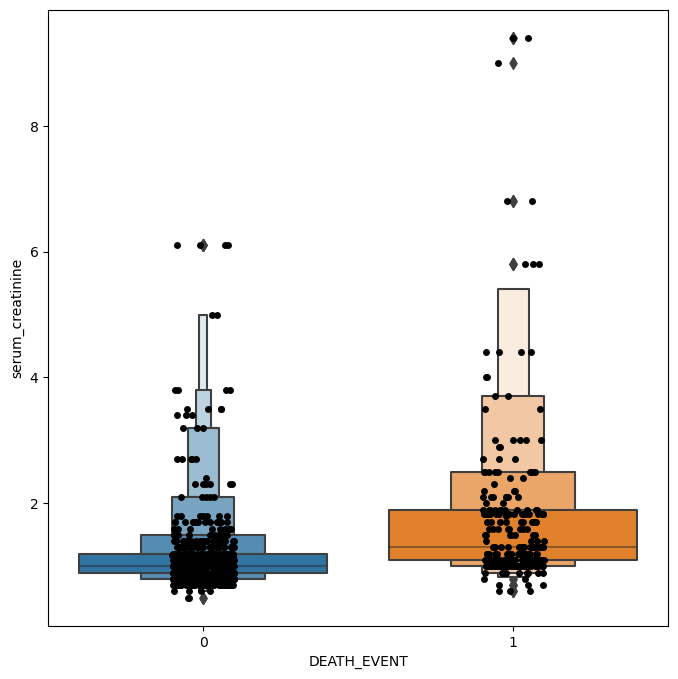

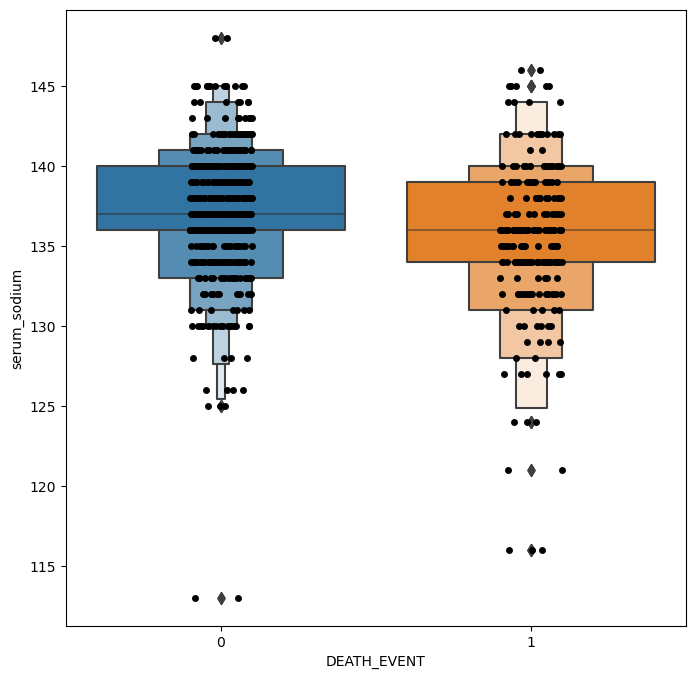

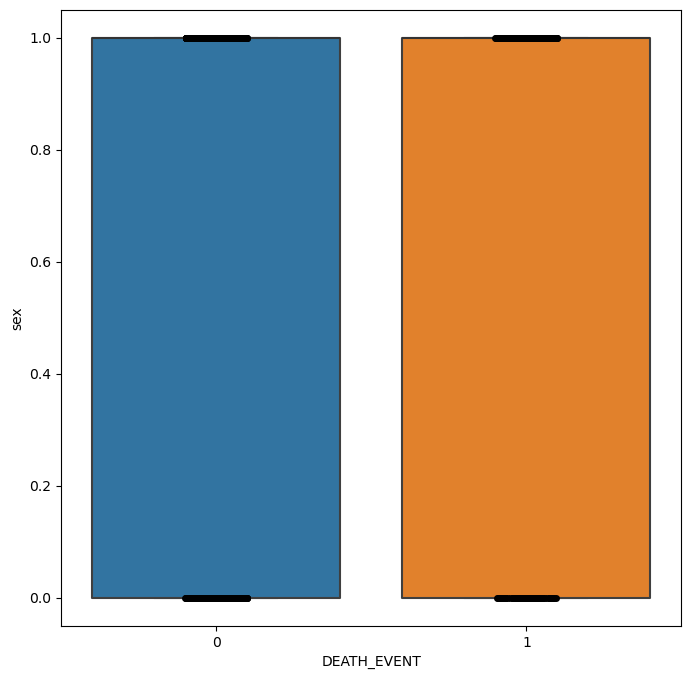

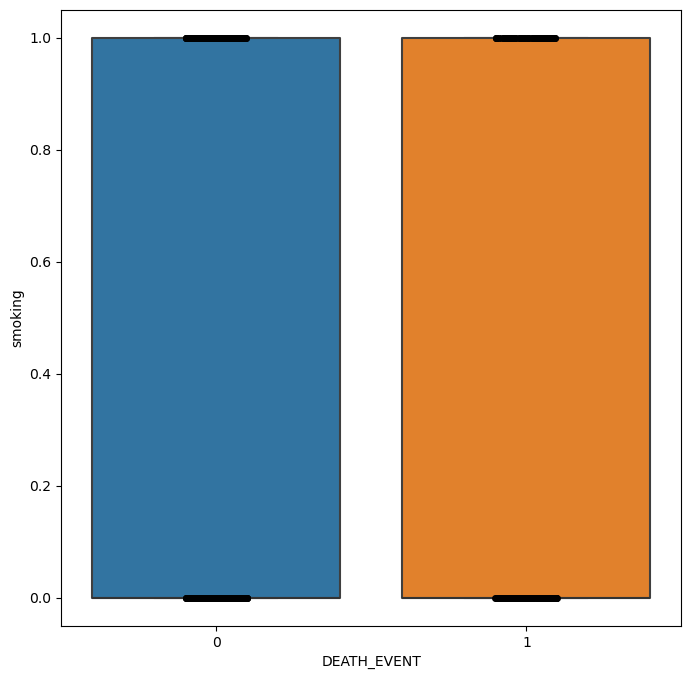

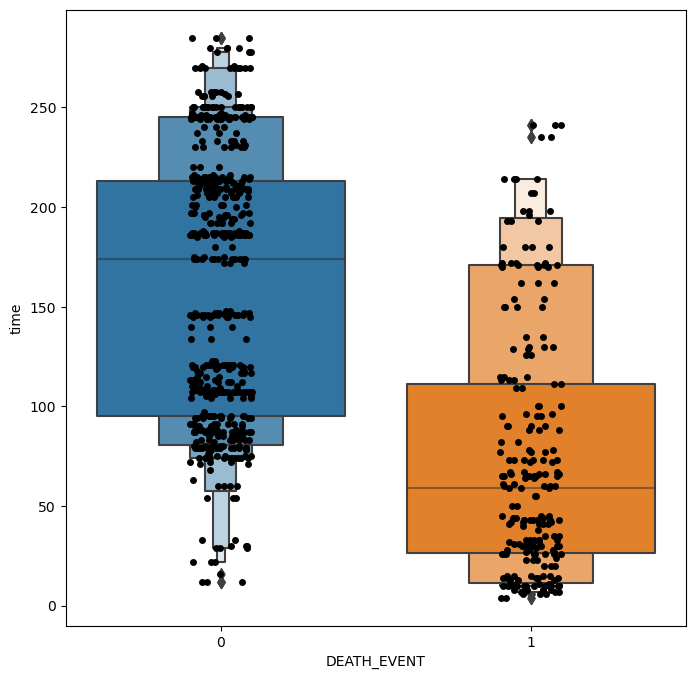

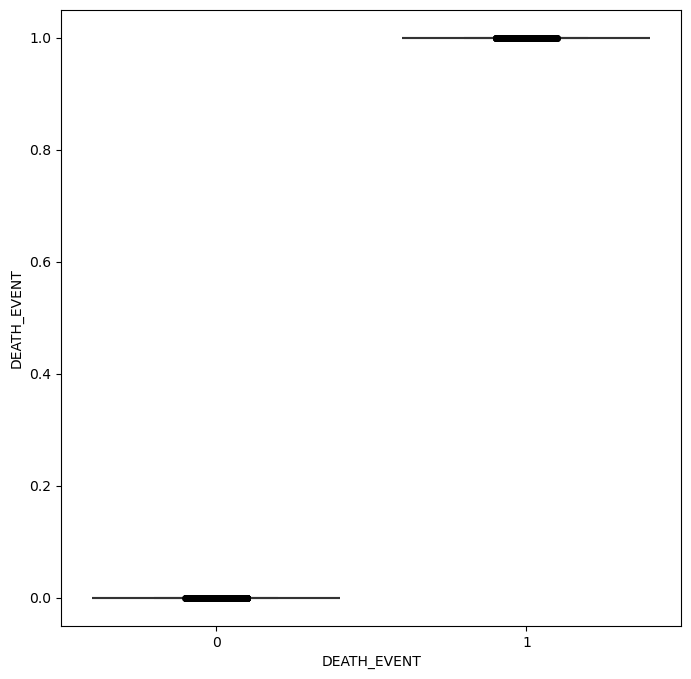

In [32]:
for i in df.columns:
   plt.figure(figsize=(8,8))
   sns.boxenplot(x = df['DEATH_EVENT'],y=df[i])
   sns.stripplot(x = df['DEATH_EVENT'],y=df[i],color='BLACK')
   plt.show

<Axes: xlabel='time', ylabel='age'>

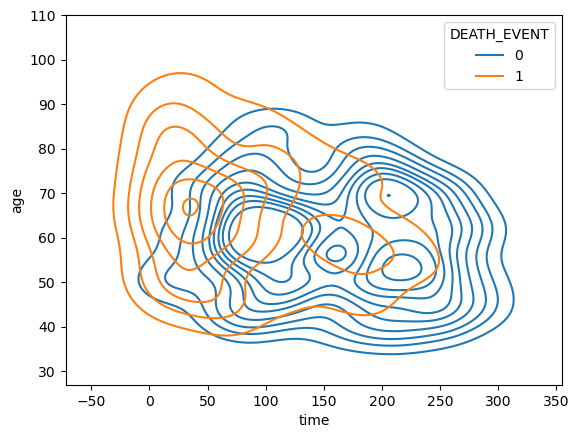

In [33]:
sns.kdeplot(x=df['time'],y=df['age'],hue=df['DEATH_EVENT'])

In [34]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [35]:
res = df.sample(n=100)

In [36]:
df = pd.concat([df,res])

In [37]:
df.shape

(898, 13)

In [38]:
df = df.sample(n=len(df)-50).sort_index()

In [39]:
col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


### Data Modelling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=col)

In [42]:
from joblib import dump
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [43]:
Features = ['time','ejection_fraction','serum_creatinine']
x = df[Features]
y = df["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [44]:
accuracy_list = []

### Logistic Regression

In [45]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [47]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  78.24%


<Figure size 640x480 with 0 Axes>

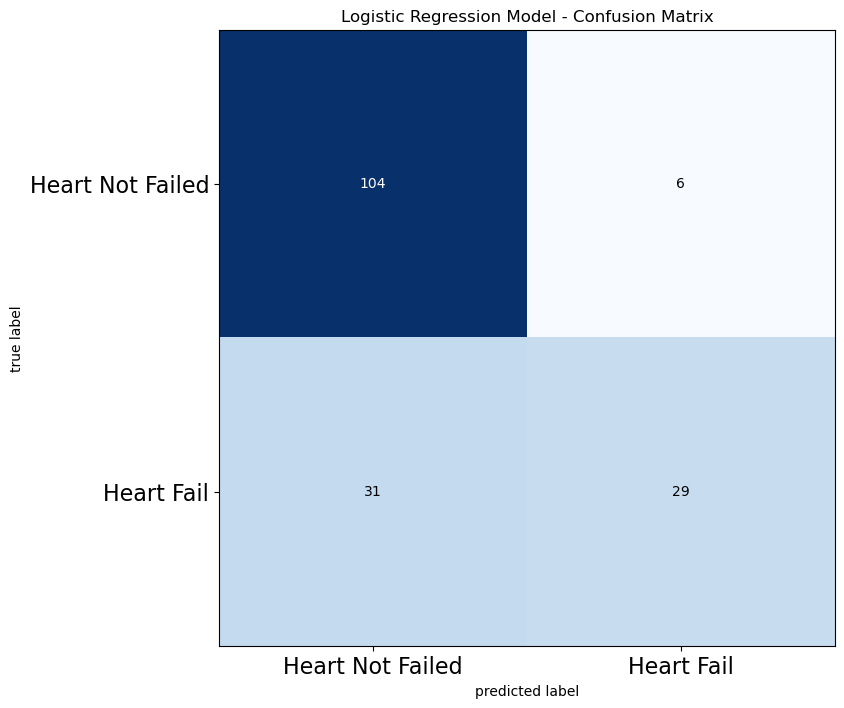

In [48]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Support Vector

In [49]:
# svc
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [50]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  85.88%


<Figure size 640x480 with 0 Axes>

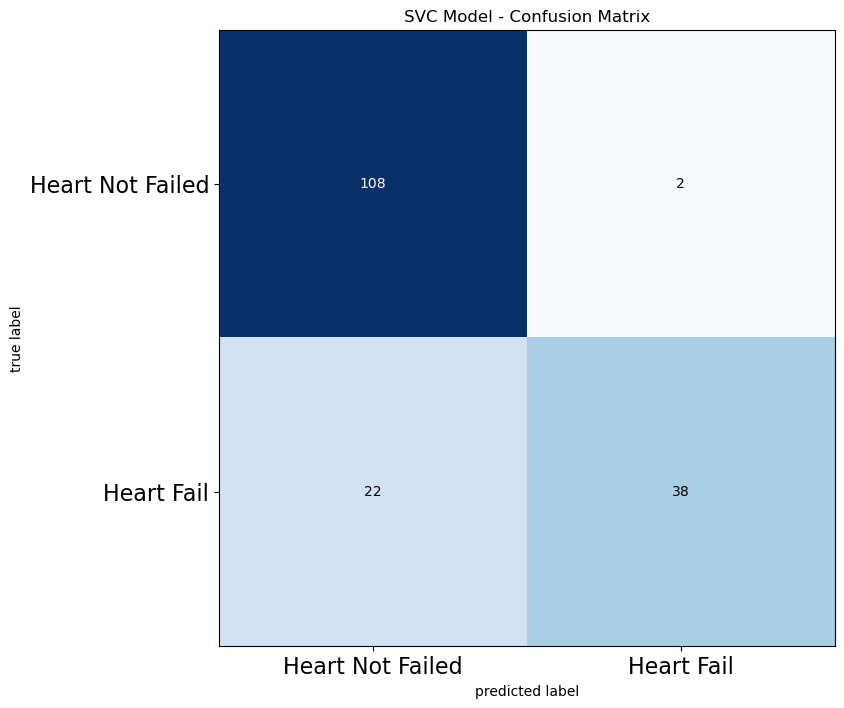

In [51]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### K Neighbours Classifier

In [52]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [53]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  90.00%


<Figure size 640x480 with 0 Axes>

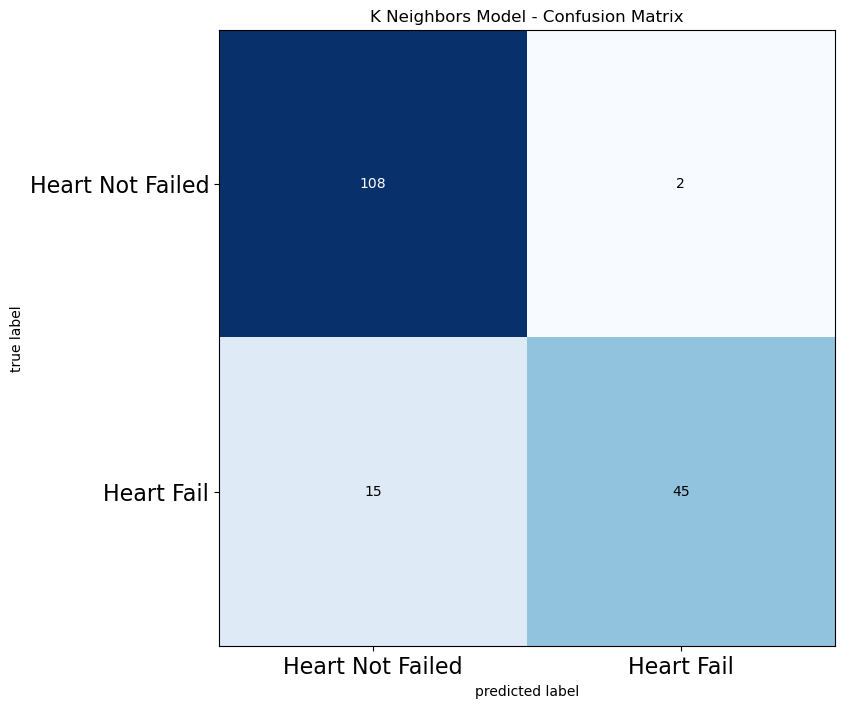

In [54]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Decision Tree Classifier

In [55]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [56]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  84.71%


<Figure size 640x480 with 0 Axes>

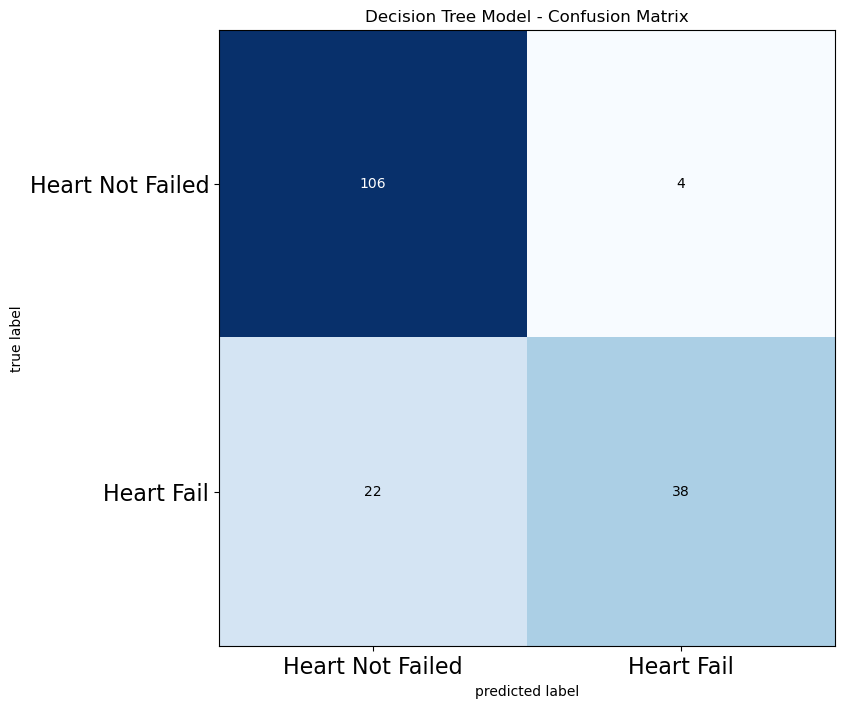

In [57]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Random Forest Classifier

In [58]:
import pickle 

In [59]:
# RandomForestClassifier
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [60]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  98.82%


In [161]:
# pickle.dump{}

SyntaxError: invalid syntax (3142048566.py, line 1)

<Figure size 640x480 with 0 Axes>

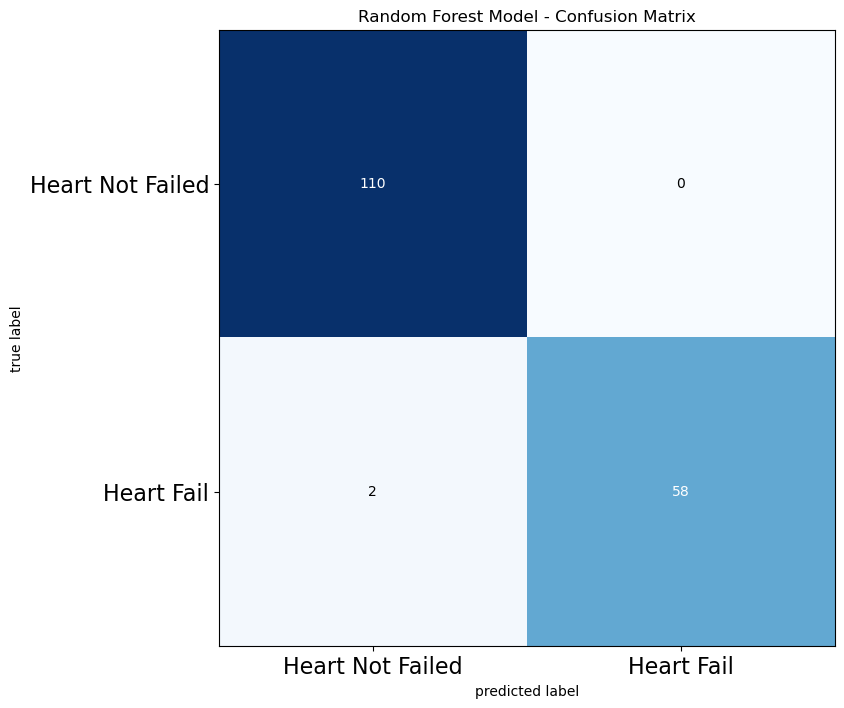

In [61]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Gradient Bossting Classifier

In [62]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [63]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  91.76%


<Figure size 640x480 with 0 Axes>

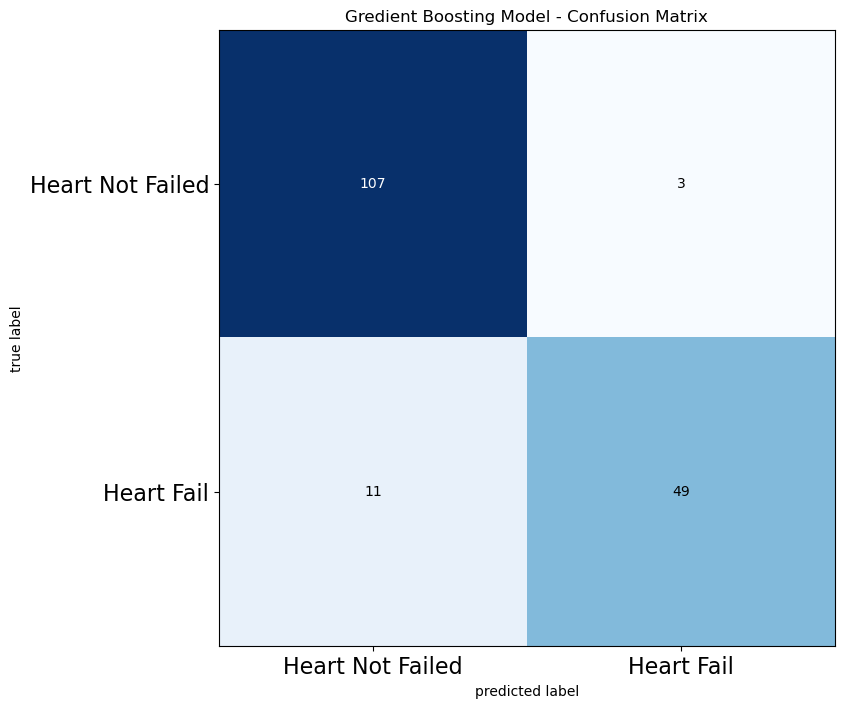

In [64]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### xgbrf classifier

In [65]:
# xgbrf classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [66]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  88.24%


<Figure size 640x480 with 0 Axes>

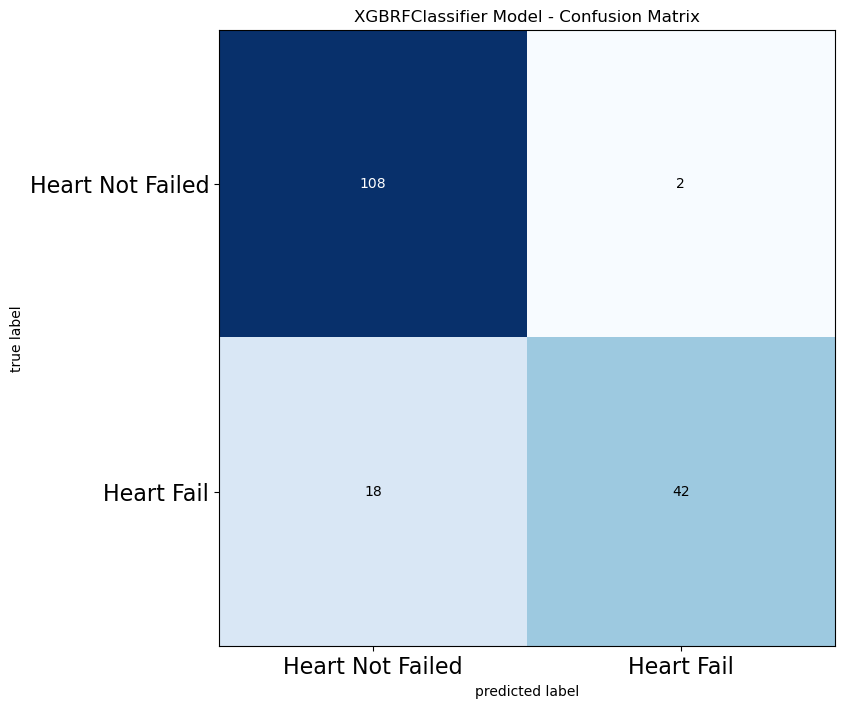

In [67]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Lightgbm

In [68]:
#  lightgbm 

lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

[LightGBM] [Info] Number of positive: 201, number of negative: 477
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 678, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.296460 -> initscore=-0.864212
[LightGBM] [Info] Start training from score -0.864212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [69]:
print(Fore.GREEN + "Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

Accuracy of LGBMClassifier is :  91.18%


<Figure size 640x480 with 0 Axes>

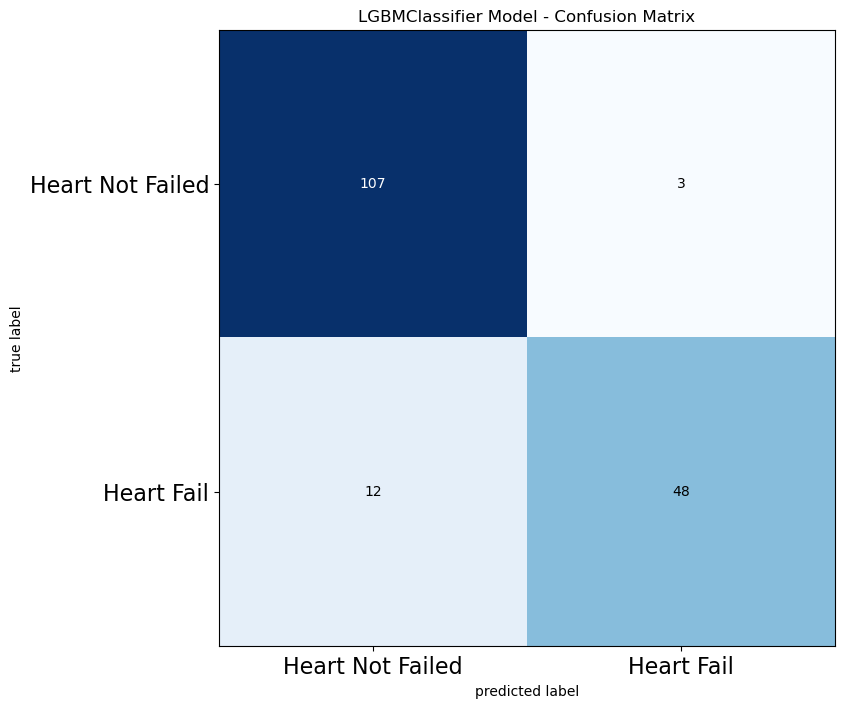

In [70]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

### Cat Boost Classifier

In [71]:
# CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.008727
0:	learn: 0.6845252	total: 155ms	remaining: 2m 35s
1:	learn: 0.6752363	total: 158ms	remaining: 1m 18s
2:	learn: 0.6665847	total: 160ms	remaining: 53.2s
3:	learn: 0.6576852	total: 162ms	remaining: 40.3s
4:	learn: 0.6508172	total: 163ms	remaining: 32.5s
5:	learn: 0.6442235	total: 165ms	remaining: 27.3s
6:	learn: 0.6364036	total: 168ms	remaining: 23.8s
7:	learn: 0.6300901	total: 172ms	remaining: 21.3s
8:	learn: 0.6217231	total: 174ms	remaining: 19.1s
9:	learn: 0.6130499	total: 176ms	remaining: 17.4s
10:	learn: 0.6066563	total: 177ms	remaining: 16s
11:	learn: 0.6004482	total: 182ms	remaining: 15s
12:	learn: 0.5946845	total: 184ms	remaining: 14s
13:	learn: 0.5879001	total: 186ms	remaining: 13.1s
14:	learn: 0.5809578	total: 189ms	remaining: 12.4s
15:	learn: 0.5742237	total: 192ms	remaining: 11.8s
16:	learn: 0.5666491	total: 194ms	remaining: 11.2s
17:	learn: 0.5599387	total: 196ms	remaining: 10.7s
18:	learn: 0.5550674	total: 198ms	remaining: 10.2s
19:	learn: 0.54

In [72]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  97.65%


<Figure size 640x480 with 0 Axes>

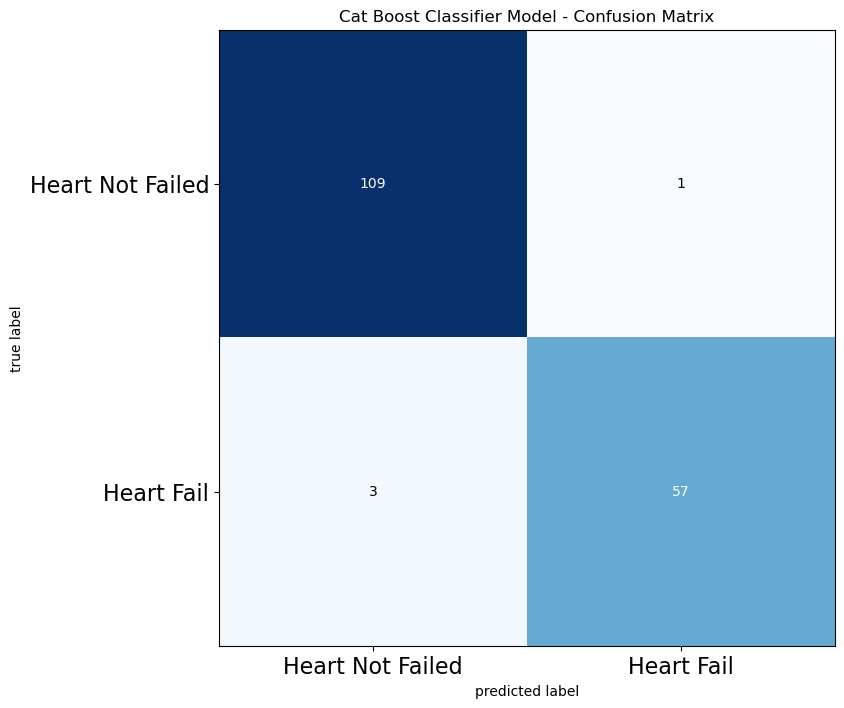

In [73]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [74]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier',]

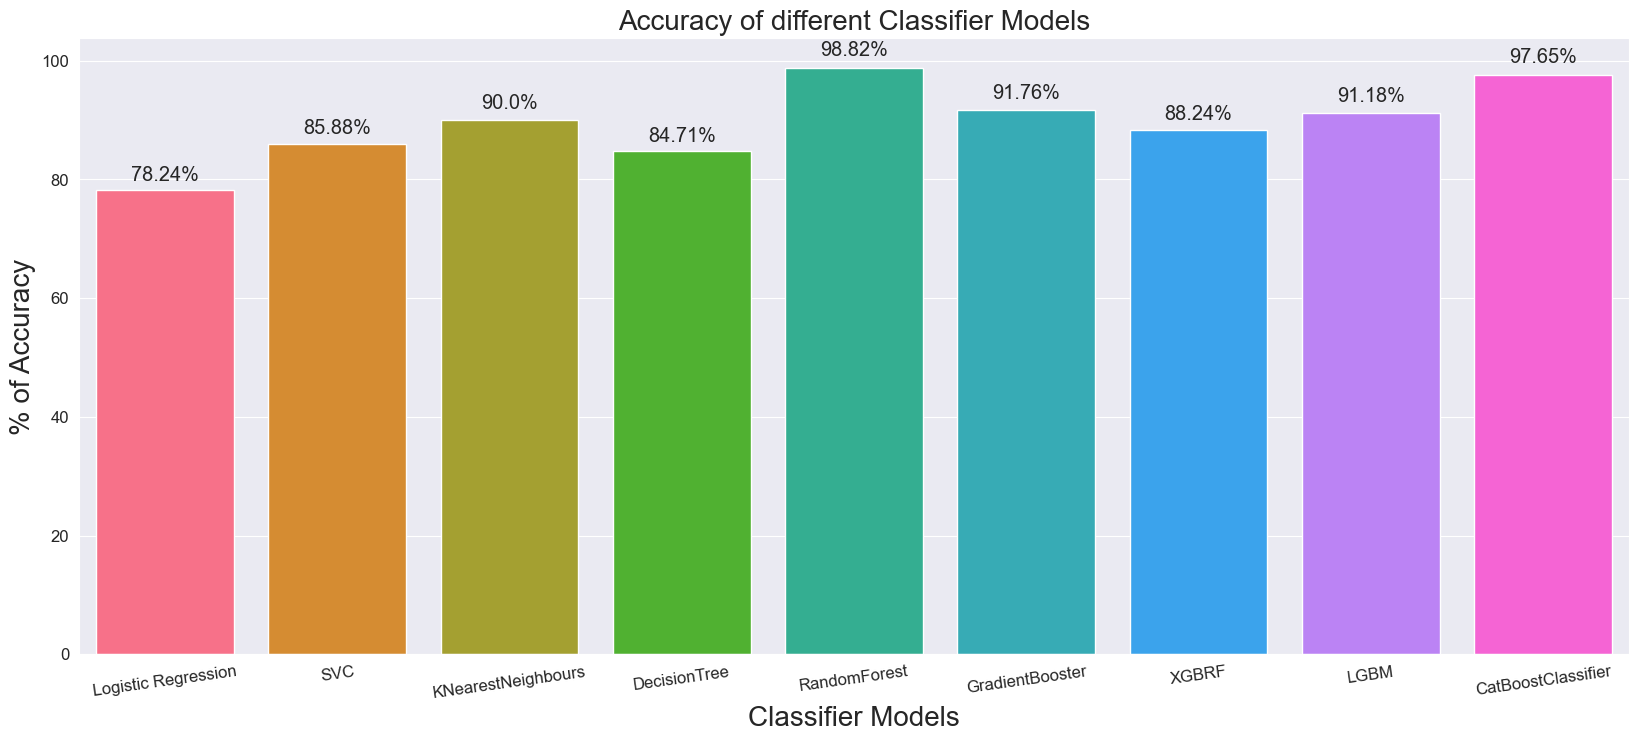

In [75]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Training Model using ANN classifier

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [128]:
col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [129]:
# Initialize the scaler
scaler = StandardScaler()

# Use the scaler to fit and transform your data
x_scaled = scaler.fit_transform(x)

# Create a DataFrame with the scaled data and column names
x_scaled_df = pd.DataFrame(x_scaled, columns=col)

In [130]:
from joblib import dump
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [133]:
from keras import callbacks
from keras import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import SGD

In [134]:
earlystopping = callbacks.EarlyStopping(
    min_delta =0.0001, patience = 20, restore_best_weights=True
)

In [135]:
model = Sequential()

In [173]:
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [174]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [175]:
history = model.fit(x_train,y_train,batch_size=32,epochs=500,callbacks=[earlystopping],validation_split=0.2)

Epoch 1/500
15/15 [==============================] - 9s 59ms/step - loss: 0.6894 - accuracy: 0.7176 - val_loss: 0.6835 - val_accuracy: 0.7000
Epoch 2/500
15/15 [==============================] - 0s 20ms/step - loss: 0.6598 - accuracy: 0.7238 - val_loss: 0.6245 - val_accuracy: 0.7000
Epoch 3/500
15/15 [==============================] - 0s 20ms/step - loss: 0.5945 - accuracy: 0.7238 - val_loss: 0.6195 - val_accuracy: 0.7000
Epoch 4/500
15/15 [==============================] - 0s 20ms/step - loss: 0.6021 - accuracy: 0.7238 - val_loss: 0.6123 - val_accuracy: 0.7000
Epoch 5/500
15/15 [==============================] - 0s 18ms/step - loss: 0.6076 - accuracy: 0.7238 - val_loss: 0.6113 - val_accuracy: 0.7000
Epoch 6/500
15/15 [==============================] - 0s 19ms/step - loss: 0.5927 - accuracy: 0.7238 - val_loss: 0.6118 - val_accuracy: 0.7000
Epoch 7/500
15/15 [==============================] - 0s 18ms/step - loss: 0.5933 - accuracy: 0.7238 - val_loss: 0.6128 - val_accuracy: 0.7000
Epoch 

In [176]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(val_accuracy*100)

69.9999988079071


In [178]:
t_pred = model.predict(x_test)
y_pred=[]
for i in t_pred:
    if(i[0]>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)

7/7 [==============================] - 0s 4ms/step


In [179]:
eval = model.evaluate(x_test,y_test)

7/7 [==============================] - 2s 5ms/step - loss: 0.6358 - accuracy: 0.6786


In [180]:
print("Accuracy: ",round(eval[1],2))

Accuracy:  0.68


In [181]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

In [182]:
from sklearn.metrics import confusion_matrix

In [171]:
y_test = np.array(y_test)

In [183]:
cm = confusion_matrix(y_test,y_pred)

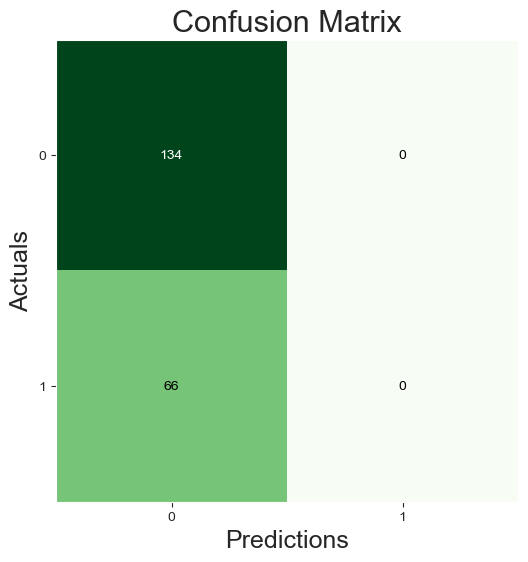

In [184]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=22)
plt.show()
